In [50]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.ndimage import convolve
from sklearn import linear_model, datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.neural_network import BernoulliRBM
from sklearn.pipeline import Pipeline

import os
import random
import PIL
from glob import glob
from scipy import misc

# https://www.kaggle.com/jrmst102/flow-ers-data-preparation
# https://www.analyticsvidhya.com/blog/2014/12/image-processing-python-basics/
from skimage.io import imread
from skimage.measure import block_reduce
from skimage.transform import resize

In [3]:
PATH = os.path.abspath("../Thinkful Projects/flowers/")
SOURCE_IMAGES = os.path.join(PATH, "daisy")

In [41]:
daisy_file_list = glob(os.path.join(SOURCE_IMAGES, "*.jpg"))

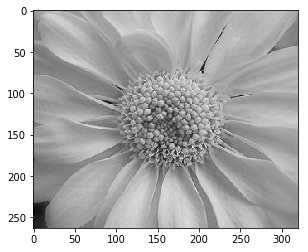

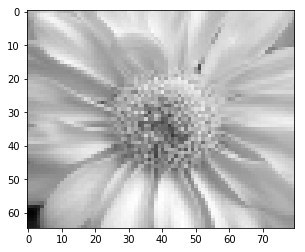

In [36]:
im = imread(daisy[0], as_gray=True)
plt.imshow(im, cmap="gray")
plt.show()

im = im[:260, :]
im2 = block_reduce(im, (4, 4), func=np.mean)
plt.imshow(im2, cmap="gray")
plt.show()

In [59]:
daisies = []
daisies_flat = []
for daisy in daisy_file_list:
    im = imread(daisy, as_gray=True)
    # Standardize image size to 260x320.
    im = resize(im, (260, 320), anti_aliasing=True, mode="reflect")
    im = block_reduce(im, (4, 4), func=np.mean)
    daisies.append(im)
    daisies_flat.append(im.flatten())
    
# reduces them to 65x80 from 260x320

In [60]:
X = np.array(daisies_flat)
X

array([[0.54387934, 0.57820512, 0.58712503, ..., 0.51766456, 0.50567597,
        0.49909791],
       [0.85501308, 0.85809833, 0.86529309, ..., 0.50864907, 0.57930951,
        0.66484871],
       [0.47193509, 0.37869262, 0.35394283, ..., 0.12048687, 0.12953372,
        0.13369884],
       ...,
       [0.39904976, 0.36368851, 0.30160859, ..., 0.23446506, 0.26286499,
        0.26607048],
       [0.31917164, 0.29692293, 0.30135643, ..., 0.78273981, 0.8214435 ,
        0.85890011],
       [0.47255694, 0.48481206, 0.479974  , ..., 0.14218658, 0.3697761 ,
        0.42249615]])

In [74]:
rbm = BernoulliRBM(n_components=100, random_state=42, verbose=True)

In [75]:
rbm.fit(X)

[BernoulliRBM] Iteration 1, pseudo-likelihood = -3363.24, time = 0.76s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -3277.30, time = 0.78s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -3315.27, time = 0.79s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -3339.37, time = 0.81s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -3268.88, time = 0.79s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -3328.91, time = 0.78s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -3254.29, time = 0.80s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -3259.41, time = 0.77s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -3330.72, time = 0.78s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -3334.61, time = 0.80s


BernoulliRBM(batch_size=10, learning_rate=0.1, n_components=100, n_iter=10,
       random_state=42, verbose=True)

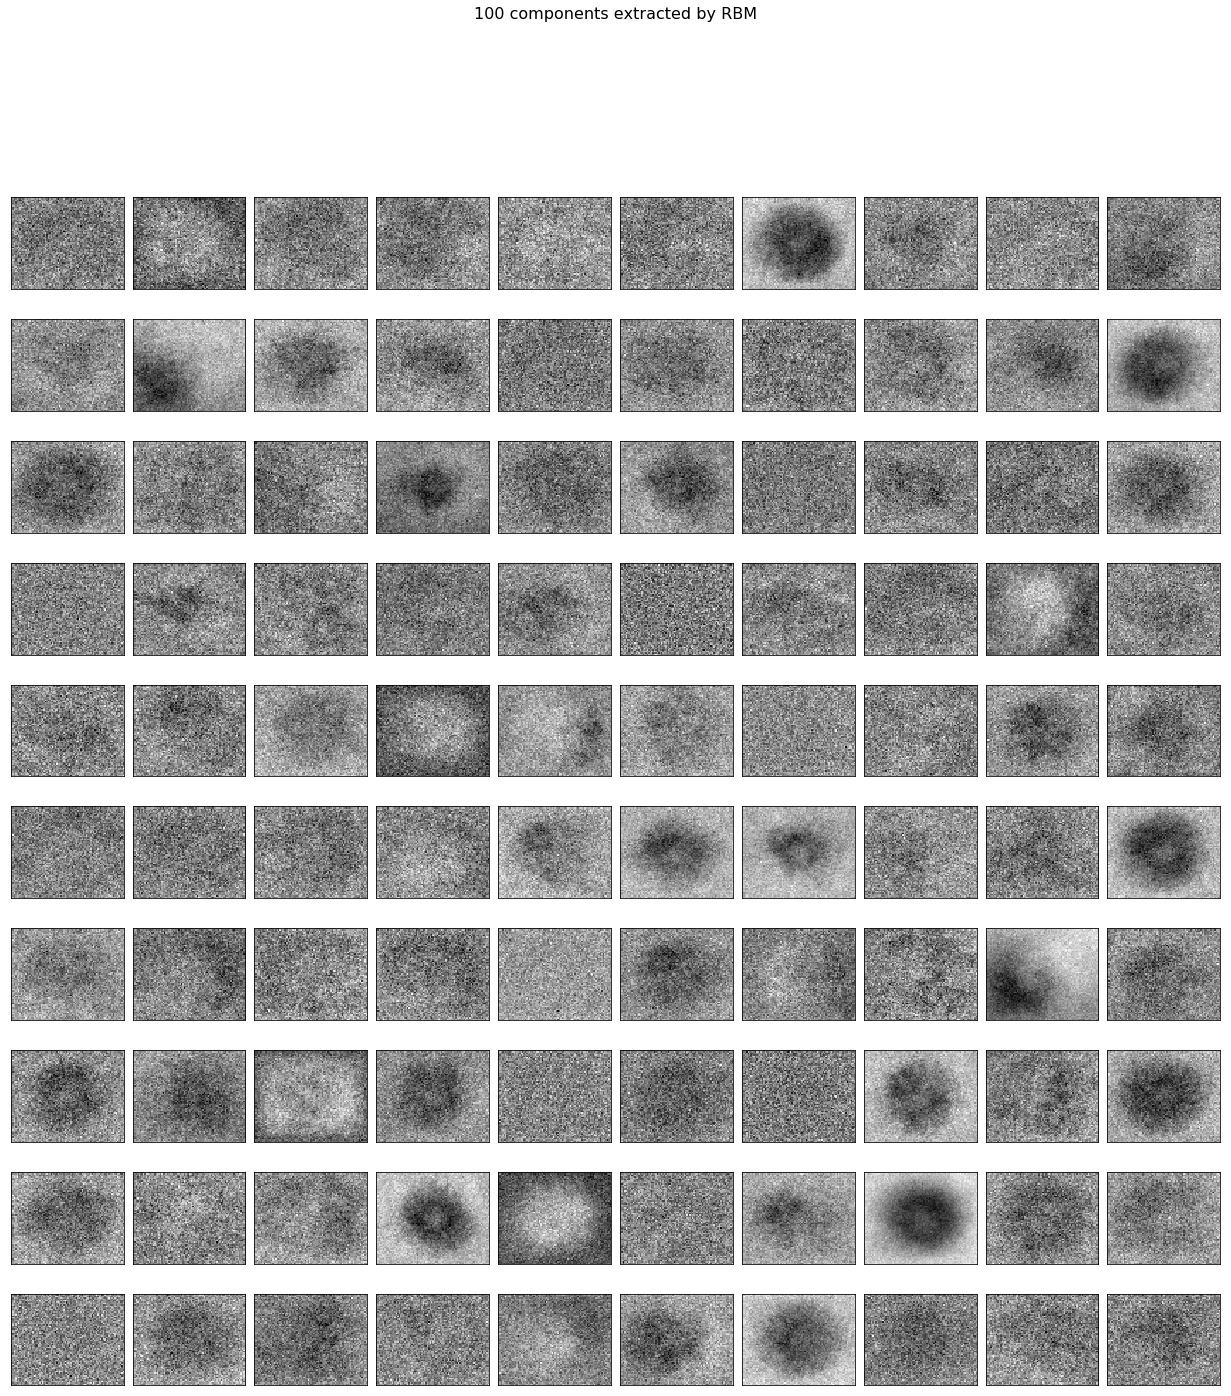

In [105]:
plt.figure(figsize=(20, 20))
for i, comp in enumerate(rbm.components_):
    plt.subplot(10, 10, i + 1)
    plt.imshow(comp.reshape((65, 80)), cmap="gray_r",
               interpolation='nearest')
    plt.xticks(())
    plt.yticks(())
plt.suptitle('100 components extracted by RBM', fontsize=16)
plt.subplots_adjust(0.08, 0.02, 0.92, 0.85, 0.08, 0.23)

plt.show()

In [82]:
# http://scikit-learn.org/stable/auto_examples/neural_networks/plot_rbm_logistic_classification.html#sphx-glr-auto-examples-neural-networks-plot-rbm-logistic-classification-py
def nudge_dataset(X):
    """
    This produces a dataset 5 times bigger than the original one,
    by moving the 65x80 images in X around by 1px to left, right, down, up
    """
    direction_vectors = [
        [[0, 1, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [1, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 1],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 1, 0]]]

    shift = lambda x, w: convolve(x.reshape((65, 80)), mode='constant',
                                  weights=w).ravel()
    X = np.concatenate([X] +
                       [np.apply_along_axis(shift, 1, X, vector)
                        for vector in direction_vectors])
    return X

In [91]:
X_nudged = nudge_dataset(X)

In [112]:
rbm_nudged = BernoulliRBM(n_components=40, 
                          learning_rate=.02,
                          n_iter=30,
                          batch_size=10,
                          random_state=42, 
                          verbose=True)
rbm_nudged.fit(X_nudged)

[BernoulliRBM] Iteration 1, pseudo-likelihood = -3341.72, time = 1.73s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -3309.04, time = 1.85s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -3244.91, time = 1.85s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -3235.24, time = 1.87s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -3148.40, time = 1.88s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -3223.88, time = 1.87s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -3176.12, time = 1.87s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -3153.58, time = 1.86s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -3137.68, time = 1.87s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -3123.89, time = 1.87s
[BernoulliRBM] Iteration 11, pseudo-likelihood = -3149.19, time = 1.87s
[BernoulliRBM] Iteration 12, pseudo-likelihood = -3110.42, time = 1.87s
[BernoulliRBM] Iteration 13, pseudo-likelihood = -3136.44, time = 1.87s
[BernoulliRBM] Iteration 14, pseudo-likelihood = -3118.58, time = 1.86s
[

BernoulliRBM(batch_size=10, learning_rate=0.02, n_components=40, n_iter=30,
       random_state=42, verbose=True)

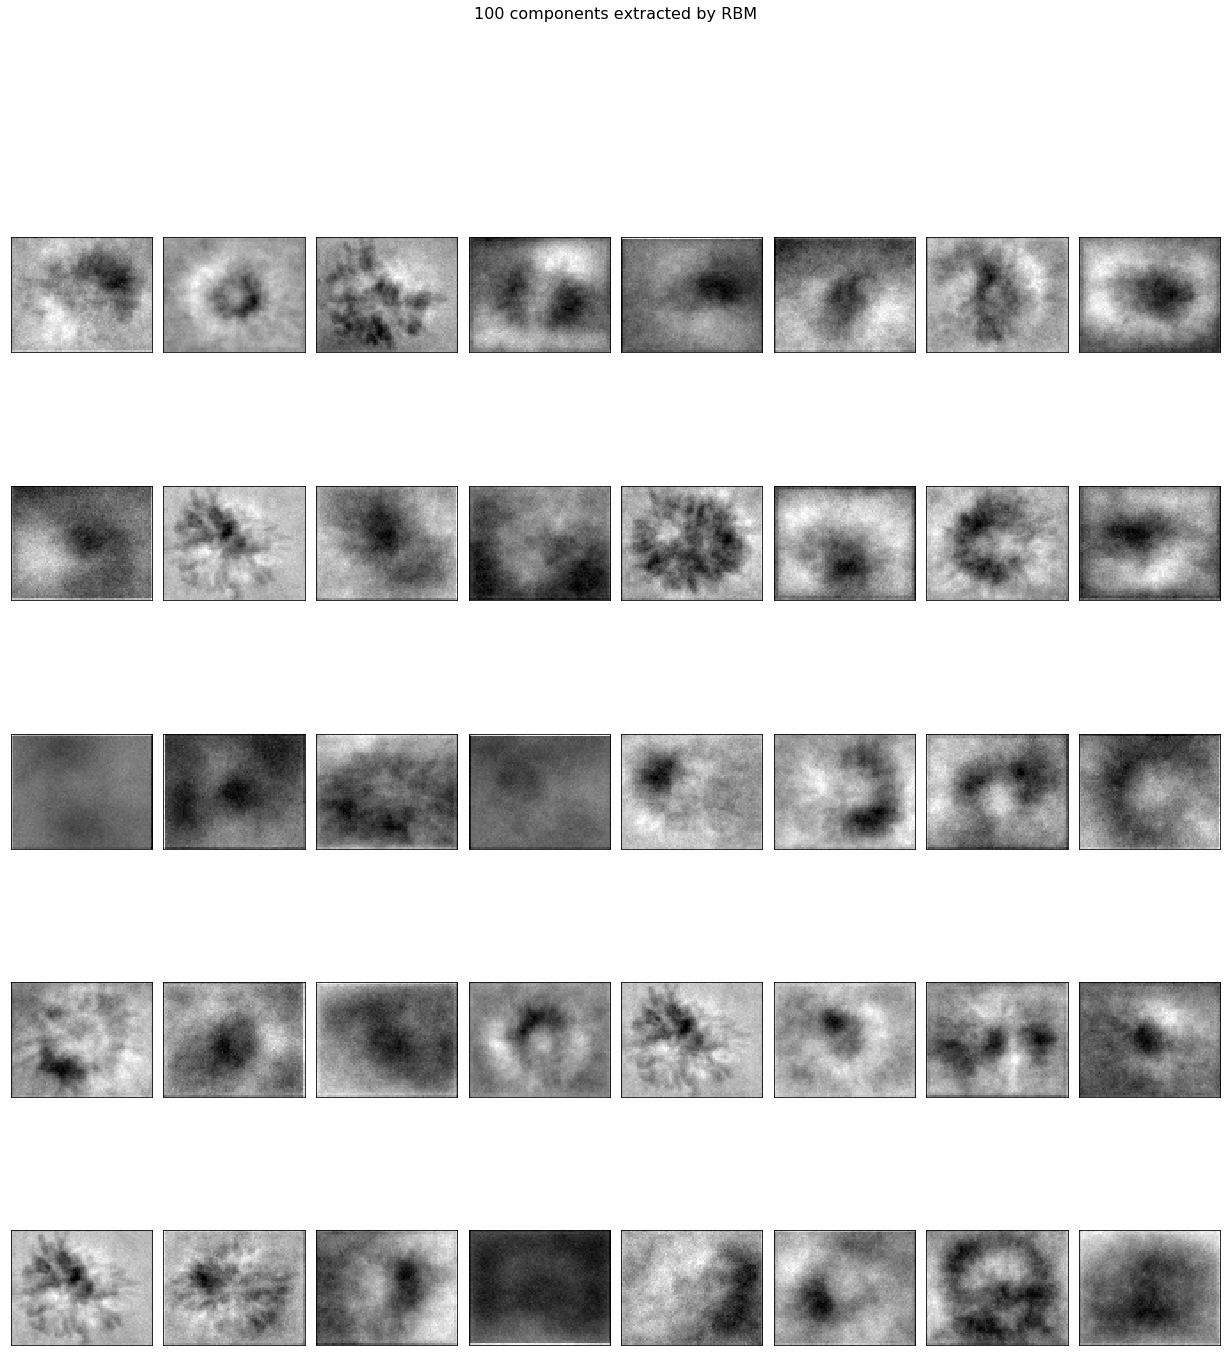

In [114]:
plt.figure(figsize=(20, 20))
for i, comp in enumerate(rbm_nudged.components_):
    plt.subplot(5, 8, i + 1)
    plt.imshow(comp.reshape((65, 80)), cmap="gray_r",
               interpolation='nearest')
    plt.xticks(())
    plt.yticks(())
plt.suptitle('100 components extracted by RBM', fontsize=16)
plt.subplots_adjust(0.08, 0.02, 0.92, 0.85, 0.08, 0.23)

plt.show()